# Generate data and calculate similarity

The goal of this notebook is to determine how much of the structure in the original dataset (single experiment) is retained after adding some number of experiments.

The approach is to,
1. Generates simulated data by sampling from a trained VAE model.  Simulate ```num_simulated_samples```
2. Add number of experiments in ```lst_num_experiments```
3. Calculate the similarity between the dataset with a single experiment and the dataset with some number of experiments added.  

In [12]:
%load_ext autoreload
%autoreload 2

import os
import sys
import glob
import pandas as pd
import numpy as np
from plotnine import ggplot, ggtitle, xlab, ylab, geom_point, geom_line, aes, ggsave
import warnings
warnings.filterwarnings(action='ignore')

sys.path.append("../")
from functions import generate_data
from functions import similarity_metric

from numpy.random import seed
randomState = 123
seed(randomState)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of functions.generate_data failed: Traceback (most recent call last):
  File "/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 626, in _exec
  File "<frozen importlib._bootstrap_external>", line 693, in exec_module
  File "<frozen importlib._bootstrap_external>", line 799, in get_code
  File "<frozen importlib._bootstrap_external>", line 759, in source_to_code
  File "<f

In [2]:
# User parameters
NN_architecture = 'NN_2500_30'
analysis_name = 'analysis_0'
num_simulated_samples = 6000
lst_num_experiments = [1,2,5,10,20,50,100,500,1000,2000,3000,6000]
use_pca = True
num_PCs = 10

In [3]:
# Input files
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../.."))    # base dir on repo
local_dir = "/home/alexandra/Documents/"                         # base dir on local machine for data storage
                                                                 # Save doesn't recognize ~

normalized_data_file = os.path.join(
    base_dir,
    "data",
    "input",
    "train_set_normalized.pcl")

In [4]:
# Output file
svcca_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "svcca.pdf")

### Generate simulated data

In [5]:
# Generate simulated data
generate_data.simulate_data(normalized_data_file,
                            NN_architecture,
                            analysis_name,
                            num_simulated_samples
                           )

Directory already exists: 
 /home/alexandra/Documents/Data/Batch_effects/simulated/analysis_0


Normalized gene expression data contains 950 samples and 5549 genes
Return: simulated gene expression data containing 6000 samples and 5549 genes


In [6]:
# Simulated data file 
simulated_data_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "simulated",
    analysis_name,
    "simulated_data.txt.xz")

### Generate permuted version of simulated data (negative control)

In [7]:
# Permute simulated data to be used as a negative control
generate_data.permute_data(simulated_data_file,
                          local_dir,
                          analysis_name)

In [8]:
# Permuted simulated data file 
permuted_simulated_data_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "simulated",
    analysis_name,
    "permuted_simulated_data.txt.xz")

### Add number of experiments to simulated data

In [9]:
# Add batch effects
generate_data.add_experiments(simulated_data_file,
                               lst_num_experiments,
                               local_dir,
                               analysis_name)

Directory already exists: 
 /home/alexandra/Documents/Data/Batch_effects/experiment_simulated/analysis_0


Creating simulated data with 1 experiments..
Creating simulated data with 2 experiments..
Creating simulated data with 5 experiments..
Creating simulated data with 10 experiments..
Creating simulated data with 20 experiments..
Creating simulated data with 50 experiments..
Creating simulated data with 100 experiments..
Creating simulated data with 500 experiments..
Creating simulated data with 1000 experiments..
Creating simulated data with 2000 experiments..
Creating simulated data with 3000 experiments..
Creating simulated data with 6000 experiments..


### Calculate similarity

In [10]:
# Calculate similarity
batch_scores, permuted_score = similarity_metric.sim_svcca(simulated_data_file,
                                                           permuted_simulated_data_file,
                                                           'Experiment',
                                                           lst_num_experiments,
                                                           use_pca,
                                                           num_PCs,
                                                           local_dir,
                                                           analysis_name)

[autoreload of functions.generate_data failed: Traceback (most recent call last):
  File "/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/alexandra/anaconda3/envs/batch_effects/lib/python3.5/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 626, in _exec
  File "<frozen importlib._bootstrap_external>", line 693, in exec_module
  File "<frozen importlib._bootstrap_external>", line 799, in get_code
  File "<frozen importlib._bootstrap_external>", line 759, in source_to_code
  File "<f

Calculating SVCCA score for 1 experiment vs 1 experiments..
Calculating SVCCA score for 1 experiment vs 2 experiments..
Calculating SVCCA score for 1 experiment vs 5 experiments..
Calculating SVCCA score for 1 experiment vs 10 experiments..
Calculating SVCCA score for 1 experiment vs 20 experiments..
Calculating SVCCA score for 1 experiment vs 50 experiments..
Calculating SVCCA score for 1 experiment vs 100 experiments..
Calculating SVCCA score for 1 experiment vs 500 experiments..
Calculating SVCCA score for 1 experiment vs 1000 experiments..
Calculating SVCCA score for 1 experiment vs 2000 experiments..
Calculating SVCCA score for 1 experiment vs 3000 experiments..
Calculating SVCCA score for 1 experiment vs 6000 experiments..


In [13]:
# log10 number of experiments
lst_num_experiments = np.log(lst_num_experiments)

# Convert similarity scores to pandas dataframe
similarity_score_df = pd.DataFrame(data={'score': batch_scores},
                                     index=lst_num_experiments,
                                    columns=['score'])
similarity_score_df.index.name = 'number of experiments'
similarity_score_df

,score
number of experiments,
0.000000,0.999994
0.693147,0.900070
1.609438,0.607380
2.302585,0.132124
2.995732,0.039475
3.912023,0.152333
4.605170,0.237688
6.214608,0.708840
6.907755,0.934743


In [14]:
permuted_score

0.09679680751745974

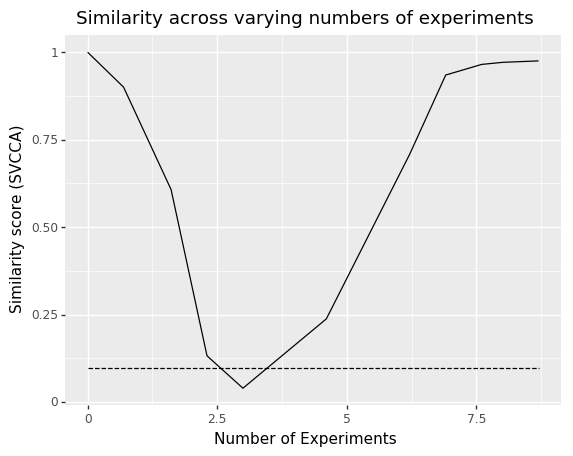

<ggplot: (-9223363282176364028)>


In [15]:
# Plot
threshold = pd.DataFrame(
    pd.np.tile(
        permuted_score,
        (len(lst_num_experiments), 1)),
    index=lst_num_experiments,
    columns=['score'])

g = ggplot(similarity_score_df, aes(x=lst_num_experiments, y='score')) \
    + geom_line() \
    + geom_line(aes(x=lst_num_experiments, y='score'), threshold, linetype='dashed') \
    + xlab('Number of Experiments') \
    + ylab('Similarity score (SVCCA)') \
    + ggtitle('Similarity across varying numbers of experiments')

print(g)
ggsave(plot=g, filename=svcca_file, dpi=300)